In [57]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [58]:
df = pd.read_csv("income.csv")
df=df.drop('Name',axis=1)
df

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

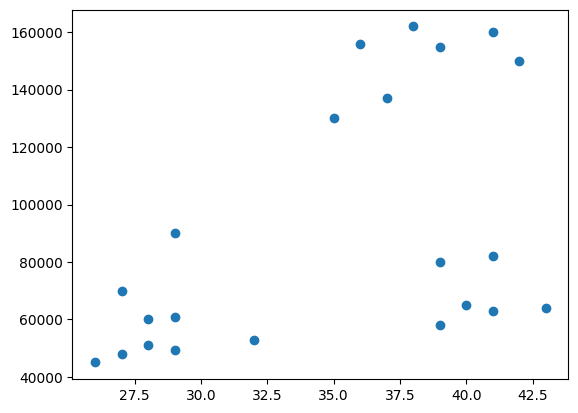

In [60]:
plt.scatter(df.Age,df[["Income($)"]])

## as the dataset is small it is visible that best no. of K (no. of cluster) = 3

In [61]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [62]:
# this will fit and predict directly...
y_pred = km.fit_predict(df[['Age',"Income($)"]])
y_pred

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [63]:
df['cluster'] = y_pred

In [64]:
df

,Age,Income($),cluster
0,27,70000,2
1,29,90000,2
2,29,61000,0
3,28,60000,0
4,42,150000,1
5,39,155000,1
6,41,160000,1
7,38,162000,1
8,36,156000,1
9,35,130000,1


# cluster_centers_ will give the centroid location

In [65]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [66]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]


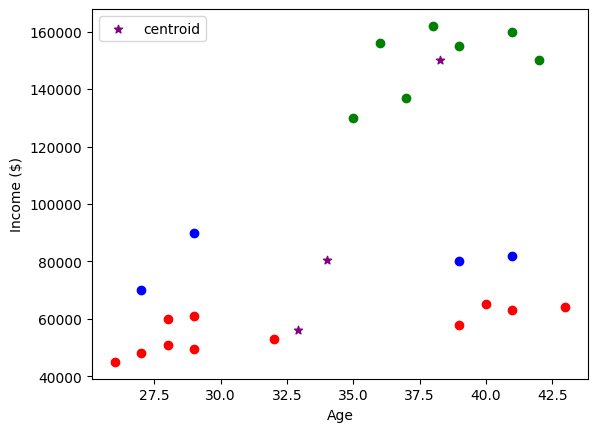

In [67]:
plt.scatter(df1.Age,df1['Income($)'],color="red")
plt.scatter(df2.Age,df2['Income($)'],color="green")
plt.scatter(df3.Age,df3['Income($)'],color="blue")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

# as it is visible the cluster are not as expected.. bcoz the dataset is small and there is a high variation in age and income ranges... so we have to do data preprocessing...

# <br> <br> Preprocessing using <u>MaxMin scaler</u>

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler = MinMaxScaler()

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])


In [70]:
df

,Age,Income($),cluster
0,0.058824,0.213675,2
1,0.176471,0.384615,2
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1
5,0.764706,0.940171,1
6,0.882353,0.982906,1
7,0.705882,1.000000,1
8,0.588235,0.948718,1
9,0.529412,0.726496,1


In [71]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income($)']])

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [72]:
df['cluster2'] = y_pred

In [73]:
df

,Age,Income($),cluster,cluster2
0,0.058824,0.213675,2,1
1,0.176471,0.384615,2,1
2,0.176471,0.136752,0,1
3,0.117647,0.128205,0,1
4,0.941176,0.897436,1,0
5,0.764706,0.940171,1,0
6,0.882353,0.982906,1,0
7,0.705882,1.000000,1,0
8,0.588235,0.948718,1,0
9,0.529412,0.726496,1,0


In [74]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

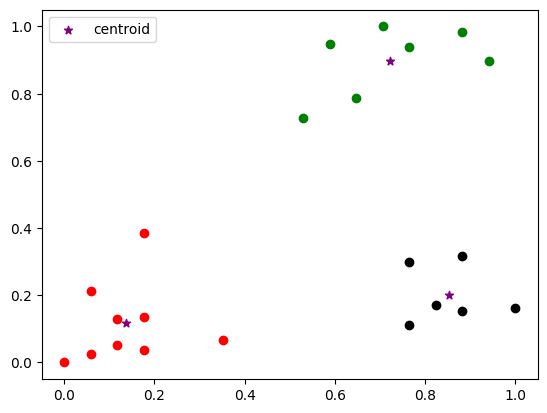

In [75]:
df1 = df[df.cluster2==0]
df2 = df[df.cluster2==1]
df3 = df[df.cluster2==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

## <br><br> Elbow Plot

In [76]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

## km.inertia_ will give the sum of square errors

In [77]:
SSE

[0.13265419827245162,
 0.13265419827245162,
 0.13706529523670868,
 0.1407244898535231,
 0.13265419827245162,
 0.13265419827245162,
 0.13781880133764024,
 0.13265419827245162,
 0.13265419827245162,
 0.13706529523670868]

Text(0, 0.5, 'Sum of squared error')

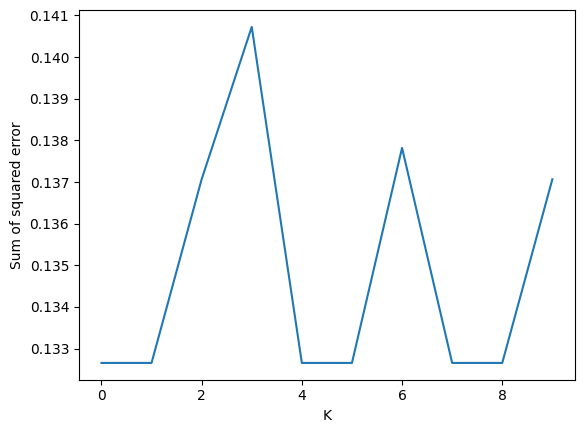

In [78]:
plt.plot(k_range,SSE)
plt.xlabel('K')
plt.ylabel('Sum of squared error')

## it should look like the down plot

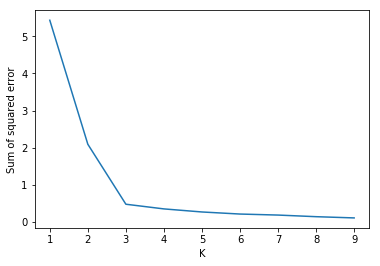

the elbow is formed at k=3, so it is best value for k.